In [ ]:
# connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the file
!unzip '/content/drive/MyDrive/ML_dataset/txt_reviews.zip' -d '/content/NLP'

Streaming output truncated to the last 5000 lines.
  inflating: /content/NLP/txt_reviews/review_95499.txt  
  inflating: /content/NLP/txt_reviews/review_955.txt  
  inflating: /content/NLP/txt_reviews/review_9550.txt  
  inflating: /content/NLP/txt_reviews/review_95500.txt  
  inflating: /content/NLP/txt_reviews/review_95501.txt  
  inflating: /content/NLP/txt_reviews/review_95502.txt  
  inflating: /content/NLP/txt_reviews/review_95503.txt  
  inflating: /content/NLP/txt_reviews/review_95504.txt  
  inflating: /content/NLP/txt_reviews/review_95505.txt  
  inflating: /content/NLP/txt_reviews/review_95506.txt  
  inflating: /content/NLP/txt_reviews/review_95507.txt  
  inflating: /content/NLP/txt_reviews/review_95508.txt  
  inflating: /content/NLP/txt_reviews/review_95509.txt  
  inflating: /content/NLP/txt_reviews/review_9551.txt  
  inflating: /content/NLP/txt_reviews/review_95510.txt  
  inflating: /content/NLP/txt_reviews/review_95511.txt  
  inflating: /content/NLP/txt_reviews/rev

In [ ]:
# creating the dataframe from the files 
import os 
import pandas as pd
product_id = []
user_id = []
frofile_name = []
help_n = []
help_m = []
score = []
time = []
review = []
text = []

# to read all files 
for files in os.listdir('/content/NLP/txt_reviews'):
  with open('/content/NLP/txt_reviews/'+files,'r') as fo:
    lines = fo.readlines()
    product_id.append(lines[0])
    user_id.append(lines[1])
    frofile_name.append(lines[2])
    help_n.append(lines[3])
    help_m.append(lines[4])
    score.append(lines[5])
    time.append(lines[6])
    review.append(lines[7])
    text.append(lines[8])
# dataframe
df1 = pd.DataFrame({'Product_id':product_id,'User_id':user_id,'Profile_name':frofile_name,
                   'Helpfullness_numerator':help_n,'HelpfilnessDenominator':help_m,
                   'Score':score,'Time':time,'Reviews':review,
                   'Text':text})


In [ ]:
df1.shape

(568454, 9)

In [ ]:
df1.head()

,Product_id,User_id,Profile_name,Helpfullness_numerator,HelpfilnessDenominator,Score,Time,Reviews,Text
0,ProductId: B0002AHT8E\n,UserId: A3EBHHCZO6V2A4\n,"ProfileName: Amaranth ""music fan""\n",HelpfulnessNumerator: 2\n,HelpfulnessDenominator: 5\n,Score: 5\n,Time: 1310774400\n,ReviewSummary: Coffee from the Cradle of Civil...,ReviewText: BRAVO Greek coffee is NOT FOR THE ...
1,ProductId: B006Z6FATY\n,UserId: A3RWEZX4R0XT5U\n,"ProfileName: J. stanutz ""bridallooks4U""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1348099200\n,ReviewSummary: Love it !!!\n,ReviewText: I had been looking for individual ...
2,ProductId: B000LKZ3Q0\n,UserId: A1IOGEZUZPII8C\n,ProfileName: travels10\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1335830400\n,ReviewSummary: Revolutionary !\n,ReviewText: This is the best soy nut butter gl...
3,ProductId: B000FOYMIC\n,UserId: A4ZQZP41D95JO\n,ProfileName: Chad Varnadore\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 2\n,Time: 1316044800\n,ReviewSummary: You get what you pay for? Or i...,ReviewText: This is the first catnip I've boug...
4,ProductId: B001H32G24\n,UserId: AJOY0G6R3RL5J\n,ProfileName: Darcy E. McMahon\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1344988800\n,ReviewSummary: Awesome for a midwestern family...,"ReviewText: I normally don't write reviews, bu..."


In [ ]:
# df1 = df

## DATA CLEANING (EDA)


In [ ]:
# removing unnecessary words and spl cherecters 
df.Time = df.Time.str.replace('Time:','')
df.Time = df.Time.str.replace('\n','')
# converting time stamp to datetime
df.Time = pd.to_datetime(df.Time,unit = 's')

df.Helpfullness_numerator = df.Helpfullness_numerator.str.replace('HelpfulnessNumerator:','')
df.Helpfullness_numerator = df.Helpfullness_numerator.str.replace('\n','')
# converting string to nuemeric
df.Helpfullness_numerator = pd.to_numeric(df.Helpfullness_numerator)

df.HelpfilnessDenominator = df.HelpfilnessDenominator.str.replace('HelpfulnessDenominator:','')
df.HelpfilnessDenominator = df.HelpfilnessDenominator.str.replace('\n','')
# converting string to nuemeric
df.HelpfilnessDenominator = pd.to_numeric(df.HelpfilnessDenominator)

df.Score = df.Score.str.replace('Score:','')
df.Score = df.Score.str.replace('\n','')

df.Reviews = df.Reviews.str.replace('ReviewSummary:','')
df.Reviews = df.Reviews.str.replace('\n','')

df.Text = df.Text.str.replace('ReviewText:','')
df.Text = df.Text.str.replace('\n','')

# add a new column 
df['Review_helpful'] = df.Helpfullness_numerator/df.HelpfilnessDenominator

# removing unnecessary columns
df = df[['Score','Time','Review_helpful','Reviews','Text']]



In [ ]:
df.head()

,Score,Time,Review_helpful,Reviews,Text
0,5,2011-07-16,0.4,Coffee from the Cradle of Civilization,BRAVO Greek coffee is NOT FOR THE WEAK! It's ...
1,5,2012-09-20,NaN,Love it !!!,I had been looking for individual packets to ...
2,5,2012-05-01,NaN,Revolutionary !,"This is the best soy nut butter gluten free, ..."
3,2,2011-09-15,NaN,You get what you pay for? Or is catnip tanta...,This is the first catnip I've bought. It see...
4,5,2012-08-15,NaN,Awesome for a midwestern family who loves oys...,"I normally don't write reviews, but we were S..."


In [ ]:
df.Review_helpful.isna().value_counts()

False    298402
True     270052
Name: Review_helpful, dtype: int64

In [ ]:
# Save File
df.to_csv('/content/drive/MyDrive/NLP_folder/NLP_dataframe.cvs')


In [ ]:
df.head()

,Score,Time,Review_helpful,Reviews,Text
0,5,2011-07-16,0.4,Coffee from the Cradle of Civilization,BRAVO Greek coffee is NOT FOR THE WEAK! It's ...
1,5,2012-09-20,NaN,Love it !!!,I had been looking for individual packets to ...
2,5,2012-05-01,NaN,Revolutionary !,"This is the best soy nut butter gluten free, ..."
3,2,2011-09-15,NaN,You get what you pay for? Or is catnip tanta...,This is the first catnip I've bought. It see...
4,5,2012-08-15,NaN,Awesome for a midwestern family who loves oys...,"I normally don't write reviews, but we were S..."


In [ ]:
df.dtypes

Score               int64
Time               object
Review_helpful    float64
Reviews            object
Text               object
dtype: object

<AxesSubplot:>

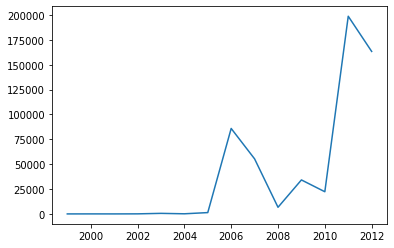

In [ ]:
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lineplot between time and money
sns.lineplot(x = df['Time'].dt.year.unique(),y = df['Time'].dt.year.value_counts().values)


In the year 2011 and 12 the orders are incresed in 

In [ ]:
df['Time'].dt.year.value_counts().values

array([198659, 163299,  85884,  55326,  34163,  22300,   6671,   1335,
          561,    132,     73,     32,     13,      6])

<AxesSubplot:xlabel='Review_helpful', ylabel='Density'>

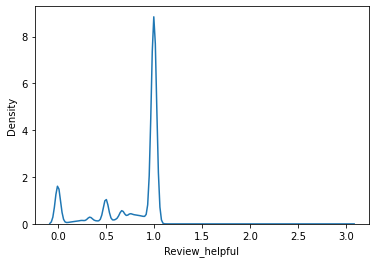

In [ ]:
sns.kdeplot(df.Review_helpful)

In [ ]:
import pandas as pd 
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP_folder/NLP_dataframe.cvs')

In [ ]:
df.head()

,Unnamed: 0,Score,Time,Review_helpful,Reviews,Text
0,0,5,2011-07-16,0.4,Coffee from the Cradle of Civilization,BRAVO Greek coffee is NOT FOR THE WEAK! It's ...
1,1,5,2012-09-20,NaN,Love it !!!,I had been looking for individual packets to ...
2,2,5,2012-05-01,NaN,Revolutionary !,"This is the best soy nut butter gluten free, ..."
3,3,2,2011-09-15,NaN,You get what you pay for? Or is catnip tanta...,This is the first catnip I've bought. It see...
4,4,5,2012-08-15,NaN,Awesome for a midwestern family who loves oys...,"I normally don't write reviews, but we were S..."


In [ ]:
# creating a function to chane the score vlaues 
def score_func(x):
  if x == 1 or x == 2:
    return 'bad'
  elif x == 3:
    return 'avarage'
  else:
    return 'good'

In [ ]:
# applying the functoin 
df.Score = df.Score.apply(score_func)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

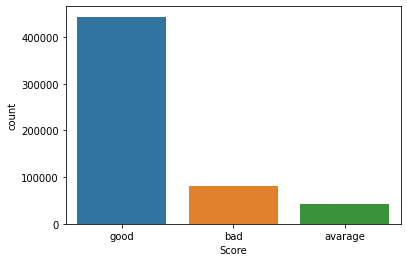

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Countplot for score
sns.countplot(df.Score)

Most of the ratings are 4 and 5 (good)

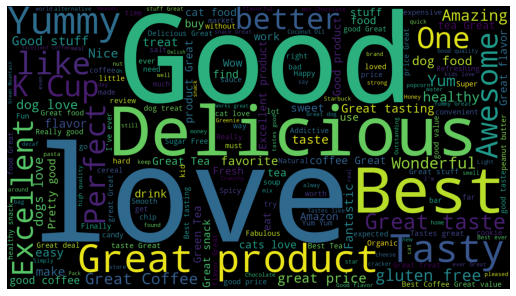

In [ ]:

import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from wordcloud import WordCloud
good_df = df.loc[df.Score == 'good',:]
words = ' '.join(good_df.Reviews)

good_words = WordCloud(stopwords = stopwords.words('english'),
                       background_color= 'black',
                       width = 1600,
                       height = 900).generate(words)
plt.figure(figsize = (9,6))
plt.imshow(good_words)
plt.axis('off')
plt.show()
# Most of the words used in score 4 and 5

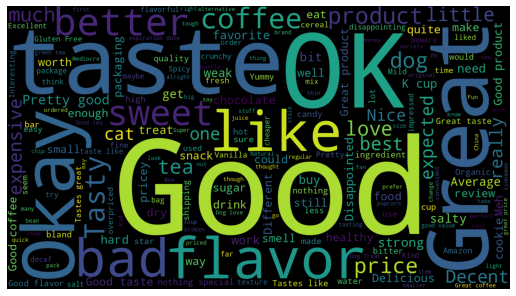

In [ ]:
plt.figure(figsize = (9,6))
bad_df = df.loc[df.Score == 'avarage',:]
words = ' '.join(bad_df.Reviews)

bad_review = WordCloud(stopwords = stopwords.words('english'),
                       background_color= 'black',
                       width = 1600,
                       height = 900).generate(words)

plt.imshow(bad_review)
plt.axis('off')
plt.show()
# Most of the words used in score 3


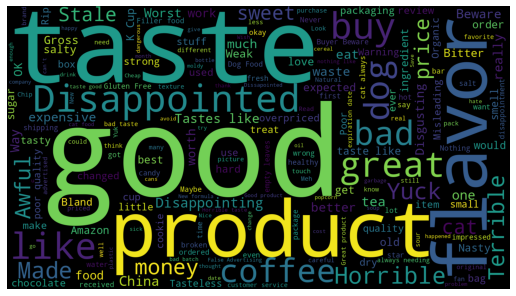

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from wordcloud import WordCloud
good_df = df.loc[df.Score == 'bad',:]
words = ' '.join(good_df.Reviews)

good_words = WordCloud(stopwords = stopwords.words('english'),
                       background_color= 'black',
                       width = 1600,
                       height = 900).generate(words)
plt.figure(figsize = (9,6))
plt.imshow(good_words)
plt.axis('off')
plt.show()
# Most of the words used in score 2


In [ ]:
X = df.Reviews
y = df.Score

# Data Preprocessing using REVIEWS

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(426340,) (142114,)
(426340,) (142114,)


## Data Cleaning 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def clean_text(text):
  # Remove special cherecters ,Convert all the the alphabets in Lowercase,Spliting 
  tokens = re.sub('[^A-Za-z]',' ',text).lower().split()
  # To remove Stopwords
  clean_tokens = [word for word in tokens if word not in stopwords.words('english')]
  # Lemmatzation
  clean_tokens = [lemma.lemmatize(word) for word in clean_tokens]

  return pd.Series([' '.join(clean_tokens),len(clean_tokens)])

In [ ]:
temp_df = X_train.apply(clean_text)
temp_df.head()

,0,1
342094,disappointed amazon,2
68900,great food high energy dog digestive problem,7
520413,great boost flavor tube,4
124628,decent canned clam chowder,4
98993,highland sugarworks grade b maple syrup ounce jug,8


In [ ]:
# Change column names
temp_df.columns = ['text_lemma','len_text_lemma']

In [ ]:
# Concating the Datasets
X_train_ = pd.concat([X_train,temp_df],axis = 1)
X_train_.head()

,Reviews,text_lemma,len_text_lemma
342094,Disappointed with Amazon,disappointed amazon,2
68900,Great Food for high energy dog with digestive...,great food high energy dog digestive problem,7
520413,Great boost and flavor in a tube,great boost flavor tube,4
124628,Decent canned clam chowder,decent canned clam chowder,4
98993,"Highland Sugarworks 100% Grade B Maple Syrup,...",highland sugarworks grade b maple syrup ounce jug,8


### Data Transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
X_train_trans = vocab.fit_transform(X_train_.text_lemma)

In [ ]:
X_train_trans

<426340x26341 sparse matrix of type '<class 'numpy.int64'>'
	with 1203553 stored elements in Compressed Sparse Row format>

In [ ]:
# Data cleaning on testdata
temp_df_test = X_test.apply(dataclean)
temp_df_test.head()

,0,1
160375,great cooky,2
92654,worst customer service encountered,4
367563,great product,2
557346,great product bottle easily mistaken,5
143941,love oil,2


In [ ]:
temp_df_test.columns = ['text_lemma','len_text_lemma']

In [ ]:
# transform the test data
X_test_trans = vocab.transform(temp_df_test.text_lemma)

# MODEL BULDING

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# predict the X_test
y_test_pre = classifier.predict(X_test_trans)

In [ ]:
# finding the score
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pre)

0.8714623471297691

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8706320278086607

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8822002054688489

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8941765061851753

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.882345432876546


# CREATING MODEL ON TEXT COLUMN

In [ ]:
# Segrigation of input and output
X = df.Text
y = df.Score

In [ ]:
# Split into Train(X) and Test(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(426340,) (142114,)
(426340,) (142114,)


In [ ]:
# Apply clean_text funcion to text data for Data cleaning in train data
temp_df = X_train.apply(clean_text)

In [ ]:
temp_df.columns = ['text_lemma','len_text_lemma']

In [ ]:
X_train_ = pd.concat([X_train,temp_df],axis = 1)
X_train_.head()

,Text,text_lemma,len_text_lemma
342094,"Not sure how I feel about the product, Murray...",sure feel product murray sugar free cooky disa...,66
68900,"At 40 per cent high quality protein, this is ...",per cent high quality protein great food young...,112
520413,We have been users of ZipFizz since it first ...,user zipfizz since first came good kick energy...,16
124628,I've had better canned clam chowder. Bookbin...,better canned clam chowder bookbinder one come...,43
98993,I am really enjoying this product :) Glad I f...,really enjoying product glad found grade b rea...,25


In [ ]:
# Data Transformation
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
X_train_trans = vocab.fit_transform(X_train_.text_lemma)

In [ ]:
X_train_trans

<426340x90831 sparse matrix of type '<class 'numpy.int64'>'
	with 14044702 stored elements in Compressed Sparse Row format>

In [ ]:
# Apply clean_text funcion to text data for Data cleaning in test data

temp_df_test = X_test.apply(clean_text)
temp_df_test.head()

,0,1
160375,son ton allergy thing homeade cooky however ma...,64
92654,saeco work straight box called customer servic...,44
367563,super product believe lost weight using good u...,9
557346,love product like many initally made error onf...,135
143941,love oil besides healthy oil good add great ta...,14


In [ ]:
temp_df_test.columns = ['text_lemma','len_text_lemma']

In [ ]:
# transform the test data
X_test_trans = vocab.transform(temp_df_test.text_lemma)

## Model Bulding for text 

In [ ]:
# Fit
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# predict the X_test
y_test_pre = classifier.predict(X_test_trans)

In [ ]:
# finding the score
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pre)

0.8713145784370294

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)



0.8586698003011667

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)


0.9184508007834566


In [ ]:
# K_Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8547352470197678


In [ ]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier''
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8841524367895325


In [ ]:
df_ = pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','AdaBoostClassifier'],
                    'Score_Reviews':[0.87146,0.88220,0.89417,0.87063,0.88234],
                    'Score_text':[0.87131,0.85866,0.91845,0.85473,0.88415]})

In [ ]:
df_

,Model,Score_Reviews,Score_text
0,LogisticRegression,0.87146,0.87131
1,DecisionTreeClassifier,0.88220,0.85866
2,RandomForestClassifier,0.89417,0.91845
3,KNeighborsClassifier,0.87063,0.85473
4,AdaBoostClassifier,0.88234,0.88415


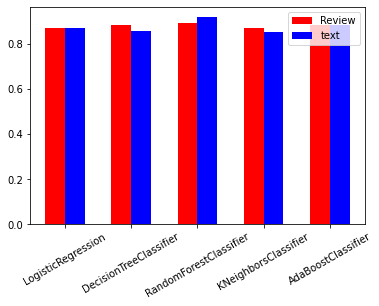

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

position = np.arange(len(df_.Model))
w = 0.3



plt.bar(position, df_.Score_Reviews,color = 'red',width = w,label = 'Review' )
plt.bar(position+w,df_.Score_text,color = 'blue',width = w,label = 'text')

plt.xticks(position+0.15, list(df_.Model),rotation = 30)
#plt.xticks()
plt.legend()
plt.show();

# Conclusion
**RandomForestClassifier** for both text and reviews features 

1.   text and reviews features are almost same with slight advantage in text feature
2.   Creating a model on Reviews is very easy ,Because it has very few words,compared text(426340x26341 in reviews,426340x90831 in text)
3.   I think create model using text feauture is best option     





